<a href="https://colab.research.google.com/github/Ravi-ranjan1801/ML-Lab/blob/main/ml_lab_01_k_hyperparameter_tuning_in%20_knn(iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [2]:
file_path = "/content/iris/iris.dat"

data = []
with open(file_path) as f:
    for line in f:
        if not line.startswith("@") and line.strip():
            data.append(line.strip())

# Convert to DataFrame
data = [row.split(",") for row in data]
df = pd.DataFrame(data)

df.head()


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
X = df.iloc[:, :-1].astype(float)
y = df.iloc[:, -1]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
import matplotlib.pyplot as plt


In [6]:
k_values = range(1, 21)
accuracies = []


In [7]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    accuracies.append(acc)


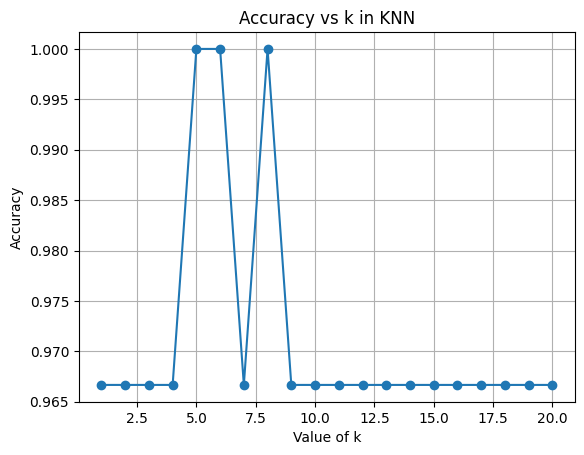

In [8]:
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k in KNN")
plt.grid(True)
plt.show()


In [9]:
param_grid = {
    'n_neighbors': list(range(1, 21))
}

knn = KNeighborsClassifier()

grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [10]:
print("Best k:", grid.best_params_['n_neighbors'])
print("Best CV Accuracy:", grid.best_score_)


Best k: 7
Best CV Accuracy: 0.9833333333333334
